# Kwanty

In [779]:
import sympy as sp
sp.init_printing()

## Symbole

In [780]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
n = sp.Symbol('n', integer = True, nonzero = True)
a = sp.Symbol('a', real = True)
h = sp.Symbol('hbar', real = True, positive = True)
psi = sp.Function('\psi')
p = -sp.I*h

## Wyliczenie $ \phi(x) $

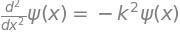

In [781]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [782]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol

In [783]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [784]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

## Wyliczenie $ <p> $

In [785]:
C = psi(x) * p * psi(x).diff(x)
C.simplify()

In [786]:
C = C.subs(psi(x), sol.rhs)
Cp = sp.integrate(C, (x, 0, a)).simplify()

## Wyliczenie $ <p^2> $

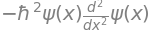

In [787]:
C =  psi(x) * p ** 2 * psi(x).diff(x).diff(x)
C.simplify()

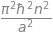

In [788]:
C = C.subs(psi(x), sol.rhs)
Cp2 = sp.integrate(C, (x, 0, a)).simplify()
Cp2

In [789]:
C =  psi(x) * x * psi(x)
C

## Sprawdzenie zasady nieozaczoności

In [790]:
C = C.subs(psi(x), sol.rhs)
Cx = sp.integrate(C, (x, 0, a)).simplify()
Cx

In [791]:
C =  psi(x) * x ** 2 * psi(x)
C

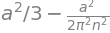

In [792]:
C = C.subs(psi(x), sol.rhs)
Cx2 = sp.integrate(C, (x, 0, a)).simplify()
Cx2

In [793]:
Q = (Cx2 - Cx ** 2) * (Cp2 - Cp ** 2)
ineq = (Q >= h/2).simplify()
ineq

In [794]:
ineq = ineq.subs(h, 6.62607015).subs(sp.pi, 3.14).simplify()
ineq = sp.reduce_inequalities(ineq, n).simplify()
ineq

True